In [17]:
import numpy as np

# Define parameters
L = 1.0
l = 1.0
Nx = 50
Ny = 50
T = 1.0
dt = 0.01
a = 1.0
b = 1.0
rho_max = 1.0
v_max = 1.2

dx = L / (Nx - 1)
dy = 2 * l / (Ny - 1)
nt = int(T / dt)

# Initialize the density field
rho = np.ones((Nx, Ny))*1e-3

# Apply initial conditions as needed
rho_initial = np.exp(-((np.linspace(-l, l, Ny)[:, None] - 0.5) ** 2 + (np.linspace(0, L, Nx)[None, :] - 0.5) ** 2) / 0.1)
rho[:, :] = rho_initial

def F(rho):
    return v_max * (1 - rho/rho_max)

# Time-stepping loop
for n in range(nt):
    rho_new = np.copy(rho)
    
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            laplacian = (rho[i+1, j] - 2*rho[i, j] + rho[i-1, j]) / dx**2 + (rho[i, j+1] - 2*rho[i, j] + rho[i, j-1]) / dy**2
            gradient_x = (rho[i+1, j] - rho[i-1, j]) / (2*dx)
            gradient_y = (rho[i, j+1] - rho[i, j-1]) / (2*dy)
            divergence = (laplacian - rho[i, j] * F(rho[i, j]))
            rho_new[i, j] = rho[i, j] + dt * divergence
    
    # Apply boundary conditions
    rho_new[0, :] = (1 - a * dt) * rho[0, :] + a * dt * rho_max
    rho_new[-1, :] = (1 - b * dt) * rho[-1, :]
    rho_new[:, 0] = rho_new[:, 1]
    rho_new[:, -1] = rho_new[:, -2]
    
    rho = np.copy(rho_new)
    
# rho contains the solution at the final time step


C:\Users\andre\AppData\Local\Temp\ipykernel_49116\4099488145.py:38: RuntimeWarning: overflow encountered in scalar multiply
  divergence = (laplacian - rho[i, j] * F(rho[i, j]))
C:\Users\andre\AppData\Local\Temp\ipykernel_49116\4099488145.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  laplacian = (rho[i+1, j] - 2*rho[i, j] + rho[i-1, j]) / dx**2 + (rho[i, j+1] - 2*rho[i, j] + rho[i, j-1]) / dy**2
C:\Users\andre\AppData\Local\Temp\ipykernel_49116\4099488145.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  gradient_y = (rho[i, j+1] - rho[i, j-1]) / (2*dy)
C:\Users\andre\AppData\Local\Temp\ipykernel_49116\4099488145.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  gradient_x = (rho[i+1, j] - rho[i-1, j]) / (2*dx)
C:\Users\andre\AppData\Local\Temp\ipykernel_49116\4099488145.py:35: RuntimeWarning: invalid value encountered in scalar add
  laplacian = (rho[i+1, j] - 2*rho[i, j] + rho[i-1, j]) / dx**2 + (rho[i, j+1] - 2*rho[i, j

In [58]:
import numpy as np

# Define parameters
L = 1.0
l = 1.0
Nx = 60
Ny = 60
T = 10.0
dt = 0.01
a = 0.8
b = 0.75
rho_max = 4.0
v_max = 1.2

dx = L / (Nx - 1)
dy = 2 * l / (Ny - 1)
nt = int(T / dt)

# Sigma matrix diagonal elements
sigma1 = .01
sigma2 = .01

# Initialize the density field
rho = np.zeros((Nx, Ny))
# Apply initial conditions as needed
rho_initial = np.exp(-((np.linspace(-l, l, Ny)[:, None] - 0.5) ** 2 + (np.linspace(0, L, Nx)[None, :] - 0.5) ** 2) / 0.1)
rho[:, :] = rho_initial

def F(rho):
    return v_max * (1 - rho/rho_max)

# Time-stepping loop
for n in range(nt):
    rho_new = np.copy(rho)
    
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            laplacian = (sigma1 * (rho[i+1, j] - 2*rho[i, j] + rho[i-1, j]) / dx**2 + 
                         sigma2 * (rho[i, j+1] - 2*rho[i, j] + rho[i, j-1]) / dy**2)
            
            grad_rho_F_x = (rho[i+1, j] * F(rho[i+1, j]) - rho[i-1, j] * F(rho[i-1, j])) / (2 * dx)
            grad_rho_F_y = (rho[i, j+1] * F(rho[i, j+1]) - rho[i, j-1] * F(rho[i, j-1])) / (2 * dy)
            divergence = laplacian - (grad_rho_F_x + grad_rho_F_y)
            
            rho_new[i, j] = rho[i, j] + dt * divergence
    
    # Apply boundary conditions
    rho_new[0, :] = (1 - a * dt) * rho[0, :] + a * dt * rho_max
    rho_new[-1, :] = (1 - b * dt) * rho[-1, :]
    rho_new[:, 0] = rho_new[:, 1]
    rho_new[:, -1] = rho_new[:, -2]
    
    rho = np.copy(rho_new)
    
# rho contains the solution at the final time step


In [59]:
rho

array([[3.99870063e+00, 3.99870063e+00, 3.99870063e+00, ...,
        3.99870063e+00, 3.99870063e+00, 3.99870063e+00],
       [2.80803966e+00, 2.80803966e+00, 2.80803966e+00, ...,
        2.80803966e+00, 2.80803966e+00, 2.80803966e+00],
       [2.55477714e+00, 2.55477714e+00, 2.55477714e+00, ...,
        2.55477714e+00, 2.55477714e+00, 2.55477714e+00],
       ...,
       [1.43368204e+00, 1.43368204e+00, 1.43368204e+00, ...,
        1.43368203e+00, 1.43368203e+00, 1.43368203e+00],
       [1.18452427e+00, 1.18452427e+00, 1.18452426e+00, ...,
        1.18452425e+00, 1.18452426e+00, 1.18452426e+00],
       [4.27961445e-06, 4.27961445e-06, 5.02656193e-06, ...,
        5.02656193e-06, 4.27961445e-06, 4.27961445e-06]])

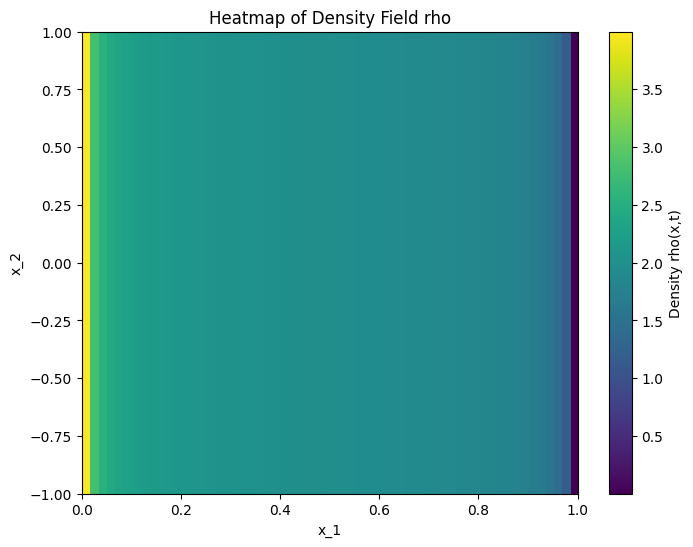

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


# Assuming rho is already calculated from the previous code snippet

# Create a heatmap of the density field rho
plt.figure(figsize=(8, 6))
plt.imshow(rho.T, extent=[0, L, -l, l], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Density rho(x,t)')
plt.title('Heatmap of Density Field rho')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


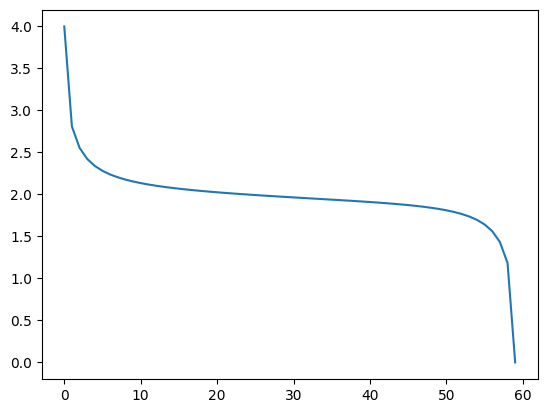

In [61]:
plt.plot(rho.T[0])
plt.show()

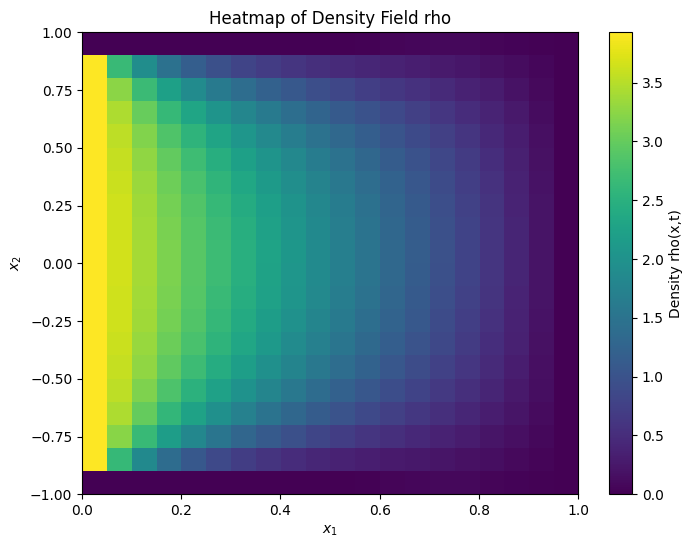

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
L = 1.0
l = 1.0
Nx = 20
Ny = 20
T = 5.0
dt = 0.05
a = 0.8
b = 0.75
rho_max = 4.0
v_max = 1.2

dx = L / (Nx - 1)
dy = 2 * l / (Ny - 1)
nt = int(T / dt)

# Sigma matrix diagonal elements
sigma1 = 1.0
sigma2 = 1.0

# Initial density field
x = np.linspace(0, L, Nx)
y = np.linspace(-l, l, Ny)
X, Y = np.meshgrid(x, y)
rho_initial = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / 0.1)
rho_initial = rho_initial.flatten()

def F(rho):
    return v_max * (1 - rho/rho_max)

def pde_rhs(t, rho):
    rho = rho.reshape((Nx, Ny))
    drho_dt = np.zeros_like(rho)
    
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            laplacian = (sigma1 * (rho[i+1, j] - 2*rho[i, j] + rho[i-1, j]) / dx**2 + 
                         sigma2 * (rho[i, j+1] - 2*rho[i, j] + rho[i, j-1]) / dy**2)
            
            grad_rho_F_x = (rho[i+1, j] * F(rho[i+1, j]) - rho[i-1, j] * F(rho[i-1, j])) / (2 * dx)
            grad_rho_F_y = (rho[i, j+1] * F(rho[i, j+1]) - rho[i, j-1] * F(rho[i, j-1])) / (2 * dy)
            divergence = laplacian - (grad_rho_F_x + grad_rho_F_y)
            
            drho_dt[i, j] = divergence
    
    # Apply boundary conditions
    drho_dt[0, :] = (1 - a) * rho[0, :] + a * rho_max - rho[0, :]
    drho_dt[-1, :] = (1 - b) * rho[-1, :] - rho[-1, :]
    drho_dt[:, 0] = 0
    drho_dt[:, -1] = 0
    
    return drho_dt.flatten()

# Solve the PDE
sol = solve_ivp(pde_rhs, [0, T], rho_initial, method='RK45', t_eval=np.linspace(0, T, nt))

# Extract the final solution
rho_final = sol.y[:, -1].reshape((Nx, Ny))

# Create a heatmap of the density field rho
plt.figure(figsize=(8, 6))
plt.imshow(rho_final.T, extent=[0, L, -l, l], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Density rho(x,t)')
plt.title('Heatmap of Density Field rho')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


In [73]:
np.random.standard_normal([100,2])

array([[-0.41841302, -0.25968049],
       [-0.05312782, -0.44312773],
       [ 1.21377774,  1.15635768],
       [-1.01727092, -0.22621291],
       [ 1.09864911,  0.07826366],
       [ 1.06505512, -0.36258436],
       [ 0.89974381,  0.38214182],
       [-1.41734224, -0.63365875],
       [ 1.24723006,  0.31268564],
       [ 0.36657002, -0.36905499],
       [ 0.29056134, -1.16228294],
       [ 1.58223883, -0.66406931],
       [ 0.04244222,  1.62464071],
       [-0.81566514, -0.56526494],
       [-2.08599376,  0.95260763],
       [ 0.06439755, -0.99338074],
       [-1.00611126,  0.44634786],
       [-0.2478125 , -0.01869677],
       [-1.10348264, -0.7684197 ],
       [ 0.10204837, -0.48786733],
       [ 1.0665206 ,  0.23827326],
       [-0.91252216, -0.46856744],
       [-0.69667206,  0.06514653],
       [-2.30496454,  0.75175639],
       [ 0.39567379,  1.97883531],
       [-1.42812245,  0.48174567],
       [-0.30795315, -0.53226934],
       [ 0.06616302, -1.40631179],
       [ 0.34769988,

In [80]:
import random

class Person:
    id_counter = 0
    
    def __init__(self, weight):
        self.id = Person.id_counter
        self.weight = weight
        Person.id_counter += 1
        
    def __repr__(self):
        return f"Person({self.id})"
        

class Room:
    def __init__(self):
        self.current_people = []
        self.all_people = []

    def generate_person(self):
        # Generate a random number, if >0.5 create a new person
        if random.uniform(0, 1) > 0.5:
            person = Person(random.uniform(0,1))
            self.current_people.append(person)
            self.all_people.append(person)
            print(f"{person} entered the room.")

    def remove_person(self):
        # Iterate over current people, generate a random number, if >0.9 remove the person
        for person in self.current_people[:]:
            if random.uniform(0, 1) > 0.9:
                self.current_people.remove(person)
                print(f"{person} left the room.")

    def simulate(self, steps=10):
        for step in range(steps):
            print(f"Step {step + 1}")
            self.generate_person()
            self.remove_person()
            print(f"Current people: {self.current_people}")
            print(f"All people: {self.all_people}")
            print("-" * 20)


# Example usage
room = Room()
room.simulate(steps=10)


Step 1
Person(0) entered the room.
Current people: [Person(0)]
All people: [Person(0)]
--------------------
Step 2
Current people: [Person(0)]
All people: [Person(0)]
--------------------
Step 3
Person(1) entered the room.
Person(0) left the room.
Current people: [Person(1)]
All people: [Person(0), Person(1)]
--------------------
Step 4
Current people: [Person(1)]
All people: [Person(0), Person(1)]
--------------------
Step 5
Current people: [Person(1)]
All people: [Person(0), Person(1)]
--------------------
Step 6
Current people: [Person(1)]
All people: [Person(0), Person(1)]
--------------------
Step 7
Current people: [Person(1)]
All people: [Person(0), Person(1)]
--------------------
Step 8
Person(2) entered the room.
Person(2) left the room.
Current people: [Person(1)]
All people: [Person(0), Person(1), Person(2)]
--------------------
Step 9
Current people: [Person(1)]
All people: [Person(0), Person(1), Person(2)]
--------------------
Step 10
Person(3) entered the room.
Current peo

In [83]:
room.current_people[1].weight

0.9786730538525875